# HOUSING: PRICE PREDICTION PROJECT

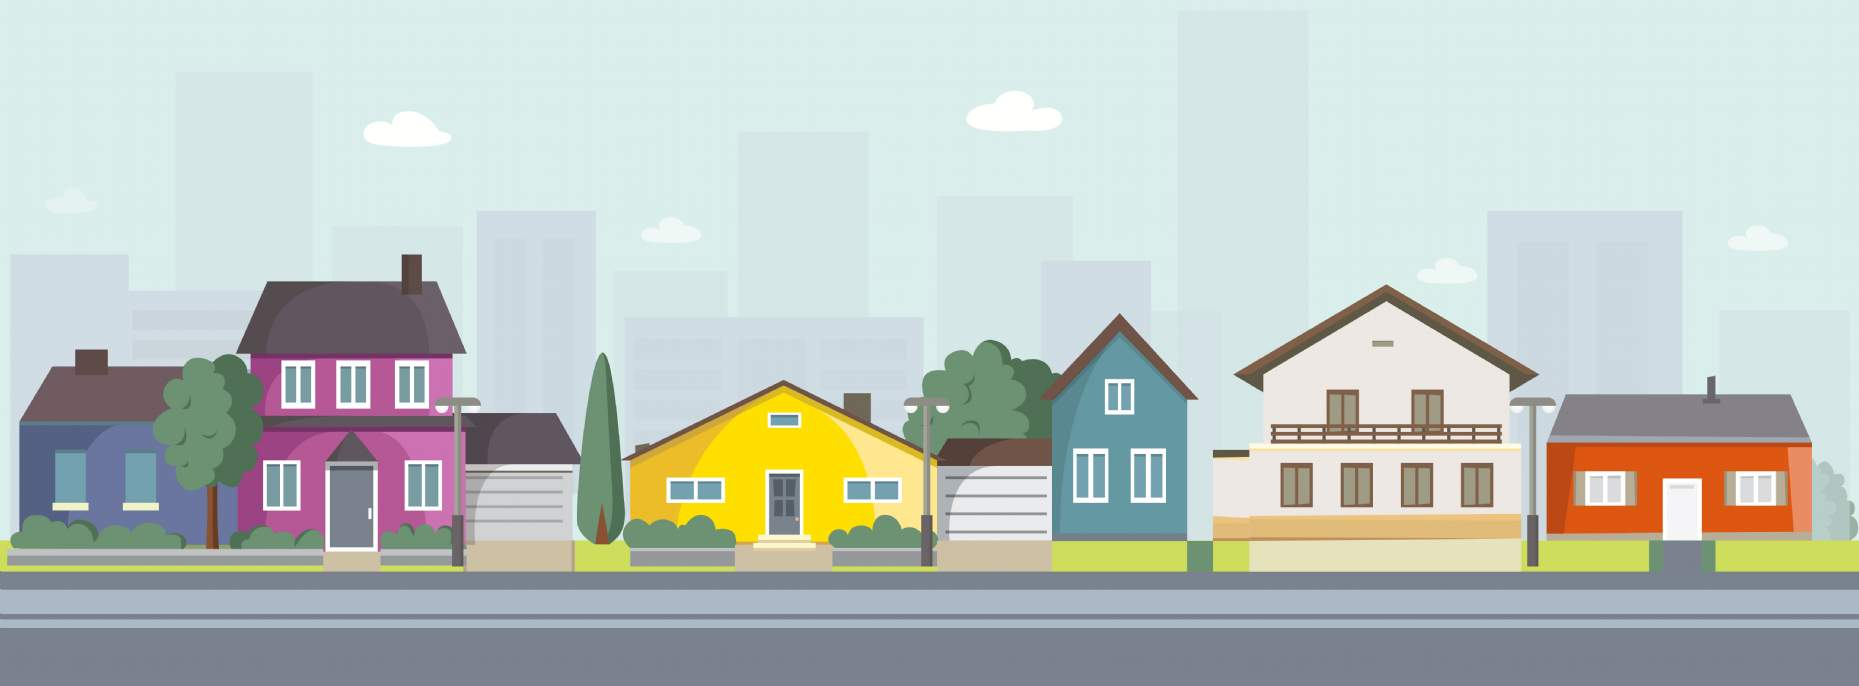

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [ ]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries/dependencies here.

In [ ]:
train_df = pd.read_csv("train.csv")

I am importing the train dataset comma separated values file and storing it into our dataframe for further usage.

In [ ]:
train_df # checking the first 5 and last 5 rows

Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 1168 rows and 81 columns present in our dataframe. In the above cell we can see the training dataset which includes the target label "SalePrice" column and the remaining feature columns that determine or help in predicting the sales. Since sales is a continous value it makes this to be a Regression problem!

# Exploratory Data Analysis (EDA)

In [ ]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [ ]:
print("We have {} Rows and {} Columns in our dataframe".format(train_df.shape[0], train_df.shape[1]))
train_df.head()

### Column Description:

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
train_df.isna().sum() # checking for missing values

Using the `isna` and `sum` fuctions together on our dataframe we can take a look at missing data information. It looks like we do have missing values present in few of our columns. However we will check the percentage of missing information before we began treating them.

In [ ]:
print("Missing column values in percentage:")
for col in train_df:
    percentage = np.round((train_df[col].isnull().sum()/train_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

So the column names and the percentage of missing data can be seen below:
LotFrontage : 18.322 %
Alley : 93.408 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinType2 : 2.654 %
FireplaceQu : 47.175 %
GarageType : 5.479 %
GarageYrBlt : 5.479 %
GarageFinish : 5.479 %
GarageQual : 5.479 %
GarageCond : 5.479 %
PoolQC : 99.401 %
Fence : 79.709 %
MiscFeature : 96.233 %

Now I have decided to drop columns that have most of their values or almost of their values filled with a "null". The columns that I am going to lose are as follows:
Alley : 93.408 %
FireplaceQu : 47.175 %
PoolQC : 99.401 %
Fence : 79.709 %
MiscFeature : 96.233 %

In [ ]:
# data preprocessing 1
train_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

I have successfully got rid of all the columns that had most of the values filled with null because treating them would mean manually entering data that was not originally collected properly and that would only make the model biased towards the few information we could get hold of.

In [ ]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(train_df.shape[0], train_df.shape[1]))
train_df.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(train_df.shape[0], train_df.shape[1]))

With the `drop_duplicates` option I was trying to get rid of all the duplicate values present in our dataset. However, we can see that there are no duplicate data present in our dataset. I tried doing the same thing for dropping null values but we were losing lots of data.

In [ ]:
train_df.info()

In the above cell we see that there are 3 columns with float datatype, 35 columns with integer datatype and 38 columns with object datatype.

In [ ]:
train_df.nunique().to_frame("Unique Values")

We are taking a look at all the unique value information present in each of the columns and remove any column that has all the rows filled with same value or all with different unique values since they are not gonna help while building our machine learning model.

In [ ]:
# data preprocessing 2
train_df.drop(["Id", "Utilities"], axis=1, inplace=True)

I see that column Id has all the rows filled with unique data while the column Utilities has only 1 unique value occupying all the rows so they both are pretty useless and I have gotten rid of them from our dataframe.

In [ ]:
object_datatype = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'O':
        object_datatype.append(x)        
print(f"Object Datatype Column Names", object_datatype)

numeric_datatype = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'int64' or train_df.dtypes[x] == 'float64':
        numeric_datatype.append(x)
print(f"\nNumeric Datatype Column Names:", numeric_datatype)

Since we have numeric as well as object datatype values I have separated those columns names in 2 different list variables that would be usefull in further analysis.

In [ ]:
train_df.describe().T

Using the `describe` method in transpose format I am taking a look at all the numeric value details and basically the count, mean, standard deviation, min, 25%, 50%, 75% and max quartile values.

In [ ]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (20,20))
sns.heatmap(round(train_df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Using the above visualization on the `describe` method we are able to observe that our target label "SalePrice" has values that are higher than the other feature column details.

In [ ]:
for col in object_datatype:
    print(col)
    print(train_df[col].value_counts())
    print("="*120)

In the above cell I am taking a look at all the unique value details present in columns that have object datatype values stored in them.

In [ ]:
train_df.corr()

Checking the correlation values for all the numeric datatype columns.

In [ ]:
print("Missing Value Data:")
print(train_df.isnull().sum())
print("\nDataframe Information:")
train_df.info()

Performing analysis in the above cell I was able to come to a conclusion on how I would want to handle the missing data issue in my dataset. I am planning to replace the object datatype columns with mode values and numeric datatype columns with it's mean values.

Mode:
- MasVnrType
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageType
- GarageFinish
- GarageQual
- GarageCond

Mean:
- LotFrontage
- MasVnrArea
- GarageYrBlt

# Filling the missing values using mean and mode options

In [ ]:
# data preprocessing 3
mode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
        "GarageFinish", "GarageQual", "GarageCond"]
mean = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for i in mode:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
    
for j in mean:
    train_df[j] = train_df[j].fillna(train_df[j].mean())
    
print("Missing values count after filling the data")
print(train_df.isna().sum())

Great it looks like we have handled the missing values issue and now none of the columns have any null value in them.

# Visualization

In [ ]:
train_df.nunique().sort_values()

I have sorted the unique values column name list to see the one's with least unique values and the one's with the most in them.

In [ ]:
single = ["CentralAir", "Street", "GarageFinish", "HalfBath", "LandSlope", "BsmtHalfBath", "PavedDrive", "BsmtExposure",
         "BsmtCond", "BsmtQual", "MasVnrType", "Fireplaces", "KitchenQual", "ExterQual", "FullBath", "KitchenAbvGr",
         "BsmtFullBath", "LotShape", "LandContour", "Electrical", "MSZoning", "YrSold", "ExterCond", "LotConfig",
         "BldgType", "GarageCond", "HeatingQC", "GarageQual", "GarageCars", "GarageType", "SaleCondition", "BsmtFinType2",
         "Heating", "Foundation", "RoofStyle", "BsmtFinType1", "Functional", "RoofMatl", "PoolArea", "HouseStyle",
         "Condition2", "BedroomAbvGr", "OverallCond", "Condition1", "SaleType"]

double = ["OverallQual", "TotRmsAbvGrd", "MoSold", "Exterior1st", "MSSubClass", "Exterior2nd", "3SsnPorch", "MiscVal", 
          "LowQualFinSF", "Neighborhood", "YearRemodAdd", "ScreenPorch", "GarageYrBlt"]

triple = ["EnclosedPorch", "LotFrontage", "YearBuilt", "BsmtFinSF2", "OpenPorchSF", "WoodDeckSF", "MasVnrArea", 
          "2ndFlrSF", "GarageArea", "BsmtFinSF1", "SalePrice", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "GrLivArea", 
          "LotArea"]

I have separated the column names as per the unique values they hold in single digit, double digit and triple digit formats.

Single Digit Unique Values:
- CentralAir         2
- Street             2
- GarageFinish       3
- HalfBath           3
- LandSlope          3
- BsmtHalfBath       3
- PavedDrive         3
- BsmtExposure       4
- BsmtCond           4
- BsmtQual           4
- MasVnrType         4
- Fireplaces         4
- KitchenQual        4
- ExterQual          4
- FullBath           4
- KitchenAbvGr       4
- BsmtFullBath       4
- LotShape           4
- LandContour        4
- Electrical         5
- MSZoning           5
- YrSold             5
- ExterCond          5
- LotConfig          5
- BldgType           5
- GarageCond         5
- HeatingQC          5
- GarageQual         5
- GarageCars         5
- GarageType         6
- SaleCondition      6
- BsmtFinType2       6
- Heating            6
- Foundation         6
- RoofStyle          6
- BsmtFinType1       6
- Functional         7
- RoofMatl           8
- PoolArea           8
- HouseStyle         8
- Condition2         8
- BedroomAbvGr       8
- OverallCond        9
- Condition1         9
- SaleType           9

Double Digit Unique Values:
- OverallQual       10
- TotRmsAbvGrd      12
- MoSold            12
- Exterior1st       14
- MSSubClass        15
- Exterior2nd       15
- 3SsnPorch         18
- MiscVal           20
- LowQualFinSF      21
- Neighborhood      25
- YearRemodAdd      61
- ScreenPorch       65
- GarageYrBlt       98

Triple Digit Unique Values:
- EnclosedPorch    106
- LotFrontage      107
- YearBuilt        110
- BsmtFinSF2       122
- OpenPorchSF      176
- WoodDeckSF       244
- MasVnrArea       284
- 2ndFlrSF         351
- GarageArea       392
- BsmtFinSF1       551
- SalePrice        581
- TotalBsmtSF      636
- 1stFlrSF         669
- BsmtUnfSF        681
- GrLivArea        746
- LotArea          892

In [ ]:
pandas_profiling.ProfileReport(train_df)

`pandas-profiling` is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. It generates interactive reports in web format that can be presented to any person, even if they don’t know programming. It also offers report generation for the dataset with lots of features and customizations for the report generated. In short, what `pandas-profiling` does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [ ]:
plt.style.use('seaborn-muted')
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

for i in train_df[single]:
    print(f"Single digit category column name:", i)
    generate_pie(train_df[i])

### Observations:

for feature LotFrontage:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 21 to 313 with mean value 70.99
•	Data is sort of positively skewed.
for feature LotArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1300 to 164660 with mean value 10484.75
•	Data is highly positively skewed and needs to be treated accordingly.
for feature YearBuilt:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1875 to 2010 with mean value 1971
•	Data is sort of negatively skewed.
for feature YearRemodAdd:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1950 to 2010 with mean value 1985
•	Data is sort of negatively skewed.
for feature MassVnrArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1600 with mean value 102.31
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtFinSF1:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 5644 with mean value 444.73
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtFinSF2:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1474 with mean value 46.65
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtUnfSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2336 with mean value 569.72
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature TotalBsmtSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 6110 with mean value 1061.1
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature 1stFlrSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 334 to 4692 with mean value 1169.86
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature 2ndFlrSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2065 with mean value 348.83
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature LowQualFinSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 572 with mean value 6.38
•	Data is highly positively skewed and needs to be treated accordingly.
for feature GrLivArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 334 to 5642 with mean value 1525.07
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtFullBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 0.43
for feature BsmtHalfBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2 with mean value 0.06
•	Data is positively skewed.
for feature FullBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 1.56
for feature HalfBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2 with mean value 0.39
for feature BedroomAbvGr:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 8 with mean value 2.88
for feature KitchenAbvGr:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 1.05
for feature TotRmsAbvGrd:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 2 to 14 with mean value 6.54
for feature Fireplaces:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 0.62
for feature GarageYrBlt:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1900 to 2010 with mean value 1978
for feature GarageCars:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 4 with mean value 1.78
for feature GarageArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1418 with mean value 776.86
for feature WoodDeckSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 857 with mean value 96.21
•	Data is spreaded.
for feature OpenPorchSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 547 with mean value 46.56
•	Data is spreaded.
for feature EnclosedPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 552 with mean value 23.02
for feature 3SsnPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 508 with mean value 3.64
for feature ScreenPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 480 with mean value 15.05
•	Data is positively high skewed.
for feature PoolArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 738 with mean value 345
for feature MiscVal:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 15500 with mean value 47.32
•	Data is positively high skewed.
for feature MoSold:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1 to 12 with mean value 6.34
for feature YrSold:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 2006 to 2010 with mean value 2007
for feature SalePrice:
•	Data is somewhat distributed normally but not in bell curve.
•	Data ranges from 34900 to 755000 with mean value 181477.01

In [ ]:
for col in train_df[double]:
    plt.figure(figsize=(20,12))
    col_name = col
    values = train_df[col_name].value_counts()
    index = 0
    ax = sns.countplot(train_df[col_name], palette="rainbow")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(train_df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

### Observations:

for feature MSSubClass:
•	Maximum number of records are available for 20.
•	Minimum number of records are available for 40.
•	Majority of records are for 20, 60, 50 & 120.
for feature MSZoning:
•	Maximum number of records are available for RL.
•	Minimum number of records are available for C(all).
for feature Street:
•	Maximum number of records are available for Pave.
•	Minimum number of records are available for Grvl.
for feature LotShape:
•	Maximum number of records are available for Reg.
•	Minimum number of records are available for IR3.
•	Majority of records are for Reg & IR1.
for feature LandContour:
•	Maximum number of records are available for Lvl.
•	Minimum number of records are available for Low.
for feature Utilities:
•	All of the records are for AllPub and hence, this feature can be dropped from the dataset as it is of no use.
for feature LotConfig:
•	Maximum number of records are available for Inside.
•	Minimum number of records are available for FR3.
for feature LandSlope:
•	Maximum number of records are available for Gtl.
•	Minimum number of records are available for Sev.
for feature Neighborhood:
•	Maximum number of records are available for NAmes.
•	Minimum number of records are available for Blueste.
•	Majority of records are for NAmes, CollgCr, OldTown, Edwards, Somerst, Gilbert, Sawyer, NWAmes and NridgHt.
for feature Condition1:
•	Most of the records are for Norm.
for feature Condition2:
•	Most of the records are for Norm.
for feature BldgType:
•	Most of the records are for 1Fam.
for feature HouseStyle:
•	Most of the records are for 1Story and 2Story.
for feature OverallQual:
•	Most of the records are for 5, 6, 7, 8, & 4.
for feature OverallCond:
•	Most of the records are for 5, 6, 7.
for feature RoofStyle:
•	Most of the records are for Gable.
for feature RoofMatl:
•	Most of the records are for CompShg.
for feature Exterior1st:
•	Most of the records are for VinylSd, HdBoard, MetalSd, Wd Sdng & Plywood.
for feature Exterior2nd:
•	Most of the records are for VinylSd, HdBoard, MetalSd, Wd Sdng & Plywood.
for feature MasVnrType:
•	Most of the records are for None and BrkFace.
for feature ExterQual:
•	Most of the records are for TA & Gd.
for feature ExterCond:
•	Most of the records are for TA.
for feature Foundation:
•	Most of the records are for CBlock and PConc
for feature BsmtQual:
•	Most of the records are for TA & Gd.
for feature BsmtCond:
•	Most of the records are for TA.
for feature BsmtExposure:
•	Most of the records are for No.
for feature BsmtFinType1:
•	Most of the records are for Unf, GLQ and ALQ.
for feature BsmtFinType2:
•	Most of the records are for Unf.
for feature Heating:
•	Most of the records are for GasA.
for feature HeatingQC:
•	Most of the records are for Ex, TA and Gd.
for feature CentralAir:
•	Most of the records are for Y.
for feature Electrical:
•	Most of the records are for SBrkr.
for feature KitchenQual:
•	Most of the records are for TA & Gd.
for feature Functional:
•	Most of the records are for Typ.
for feature GarageType:
•	Most of the records are for Attchd and Detchd.
for feature GarageFinish:
•	Most of the records are for Unf.
for feature GarageQual:
•	Most of the records are for TA.
for feature GarageCond:
•	Most of the records are for TA.
for feature PavedDrive:
•	Most of the records are for Y.
for feature SaleType:
•	Most of the records are for WD.
for feature SaleCondition:
•	Most of the records are for Normal.

In [ ]:
plt.style.use('seaborn-colorblind')
for j in train_df[triple]:
    plt.figure(figsize=(15,10))
    print(f"Scatter plot for {j} column with respect to the rows covered ->")
    plt.scatter(train_df.index, train_df[j])
    plt.show()

### Observations:

-> Maximum standard deviation of 8957.44 is observed in LotArea column. -> Maximum SalePrice of a house observed is 755000 and minimum is 34900. -> In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed. -> In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed. -> In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [ ]:
plt.style.use('seaborn-bright')

train_df.hist(figsize=(20,30))
plt.show()

### Observations:

-> lotFrontage:Almost all houses have LotFrontage between 20 to 150 -> lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft -> OverallQual: Rates the overall material and finish of the house-: Around 300 houses sold were in average condition. Only 10-15 houses were in excellent condition. -> YearBuilt: Original construction date-: More number of people have brought the houses build after 1990 -> MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200 -> BsmtFinSF1: Type 1 finished square feet-: Most houses have Type 1 finished square feet area of basement between 0 and 1500 -> BsmtFinSF2: Type 2 finished square feet-: Around 1000 houses have Type 2 finished square feet area of 0
-> BsmtUnfSF: Unfinished square feet of basement area-: Around 130 houses have unfinished basement of area around 100-500 sqft -> 1stFlrSF: First Floor square feet-: Around 280 houses have 1st floor square feet area between 800-1200sqft -> GrLivArea: Above grade (ground) living area square feet-: Most houses have above ground living sq ft area in between 800 to 3000 -> BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathroom in basement and very few has 2 full bathrooms -> FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3 -> HalfBath: Half baths above grade-: around 700 houses have no half bathrooms very few has 1 half bathroom -> Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-: Most houses have 3 bedrooms above ground followed by 2 and 4 -> Kitchen: Kitchens above grade-: Maximum houses have 1 Kitchen. very few have 2 -> TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-: Around 300 houses have 6 rooms, around 200 have 5, &250 have 7. Very few have 12 & 14 rooms -> Fireplaces: Number of fireplaces-: Most houses have 0 fireplaces followed by 1 -> GarageCars: Size of garage in car capacity-: Most houses have garage with 2 car capcity -> GarageArea: Size of garage in square feet-: Most houses have Garage area in between 200 to 800
-> woodDeckSF: Wood deck area in square feet-: More than 50% of houses have 0 Wood Deck sqft area and rest have in between 0 to 400 -> OpenPorchSF: Open porch area in square feet-:25% of houses have 0 open porch sqft area and rest have in between 0 to 300 -> EnclosedPorch: Enclosed porch area in square feet-: Almost all houses have 0 enclosed porch sqft area -> ScreenPorch: Screen porch area in square feet-: Almost all houses have 0 screen porch area sqft -> Sale Price-: Around 500 houses have sale price in between 100000 to 200000.Very few houses have sale price of 600000 & 700000

# Correlation using a Heatmap
- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [ ]:
upper_triangle = np.triu(train_df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Observations: 

>'MSSubClass’,'OverallCond’,'OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'KitchenAbvGr’,'YrSold','EnclosedPorch','MiscVal' are negatively correlated with the target column, rest all are positively correlated 

> 'OverallQual' & 'GrLivArea' are highly positively correlated with target column 

>'MSSubClass','OverallCond','OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

# Encoding the categorical object datatype columns

In [ ]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(train_df, object_datatype)
df.head()

I defined a function to apply `OrdinalEncoder` on my feature columns to convert the object datatype columns to numeric format.

In [ ]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))

Checking the number of rows and columns after applying the encoding technique on them.

In [ ]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using the boxen plot we are able to see some outliers details however when I tried to remove outliers I was losing around 58% of data and therefore I decided on retaining the information that I have left with me.

In [ ]:
df.skew()

With the `skew` method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using the above distribution plot we are able to see some skewness present in few of the columns that will need to be handled. However right now I am trying to choose the outlier value retained data to work upon my machine learning model.

# Correlation Bar Plot comparing features with our label

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(16,6))
df_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs SalePrice Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

### Observations:

> SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea. 

> SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [ ]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding the best random state for building Regression Models

In [ ]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is 340 and we will use this in our ML models.

# Feature importance dataframe

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

In the above cell we can the columns arranged in descending order as per their importance weightage while predicting our label variable.

# Machine Learning Model for Regression with Evaluation Metrics

In [ ]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=340)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [ ]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

Created the linear regression model and checked for all it's evaluation metrics as well.

In [ ]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

Created the ridge regression model and checked for all it's evaluation metrics as well.

In [ ]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

Created the lasso regression model and checked for all it's evaluation metrics as well.

In [ ]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

Created the Support Vector Regression model and checked it's evaluation metrics.

In [ ]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [ ]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

Created the Random Forest Regressor model and checked it's evaluation metrics.

In [ ]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [ ]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [ ]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [ ]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

Created the Extra Trees Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning

In [ ]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 111, 340]
             }

After comparing all the regression models I have selected Extra Trees Regressor as my best model and have listed down it's parameters above referring the sklearn webpage.

In [ ]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [ ]:
GSCV.fit(X_train,Y_train)

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [ ]:
GSCV.best_params_

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [ ]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=100, n_jobs=-2, random_state=42)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it.

# Saving the best model

In [ ]:
filename = "SurpriseHousingSalePrice.pkl"
joblib.dump(Final_Model, filename)

Finally, I am saving my best regression model using the joblib library.

# Importing and Pre processing the Testing Dataset to predict the SalePrice column for Surprise Housing Project

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

Now we are importing the test comma separated values file and viewing it in our dataframe format with the help of pandas.

In [ ]:
print("We have {} Rows and {} Columns in our dataframe".format(test_df.shape[0], test_df.shape[1]))

Using the `shape` option we are checking the total number of rows and columns present in our testing dataset.

In [ ]:
test_df.isnull().sum()

Taking a look at the missing values information and we can see columns that do not have appropriate data and are rather filled with nulls.

In [ ]:
print("Missing column values in percentage:")
for col in test_df:
    percentage = np.round((test_df[col].isnull().sum()/test_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

I am taking a look at the missing value percentage to discard columns that have most of the null values filled in them and makes no sense to treat it manually creating a biasness in our ML model.

In [ ]:
# data preprocessing 1
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

# data preprocessing 2
test_df.drop(["Id", "Utilities"], axis=1, inplace=True)

# data preprocessing 3
for i in mode:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
for j in mean:
    test_df[j] = test_df[j].fillna(test_df[j].mean())
    
print("Missing values count after filling the data")
print(test_df.isna().sum())

Now I have applied all the pre processing methods that were used on training dataset to treat the null values from our testing dataset too.

In [ ]:
test_df.dropna(inplace=True)

I am making sure that there are no null values present in our final testing dataset before I proceed to encode object datatype columns.

In [ ]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

X=ordinal_encode(test_df, object_datatype)
X.head()

With the help of `OrdinalEncoder` and using it inside a function I have converted all object datatype feature columns into numeric datatype that can be understood by the machine learning model.

In [ ]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(X.shape[0], X.shape[1]))

Once again I am taking a look at the number of rows and columns present for our testing dataset containg feature columns.

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

Before jumping to pridicting the target label I am applying scaling technique to ensure that the model does not get baised towards a particular feature.

# Prediction of Sale Price column

In [ ]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Predicted_Sales = Final_Model.predict(X)
predicted_output = pd.DataFrame()
predicted_output['SalePrice']=Predicted_Sales
predicted_output.head()

Using the best regression model I have predicted the Sale Price for our test dataset and stored it in a dataframe.

In [ ]:
final_test_data = pd.concat([test_df, predicted_output], axis=1)
final_test_data.head()

Here I am concatenating the test dataset and predicted Sale Price dataframe so that they can resemble the training dataset.

In [ ]:
final_test_data.to_csv("Predicted_Sales_Data.csv", index=False)

With the help of `to_csv` I have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.

# Inference:

-> After getting an insight of this dataset, we were able to understand that the Housing prices are done on basis of different features. 
-> First, we loaded the train dataset and did the EDA process and other pre-processing techniques like outlier and skewness check, handling the null values present, filling the missing data with mean and mode, visualizing the distribution of data, etc. 
-> Then we did the model training, building the model and finding out the best model on the basis of different metrices scores we got like R2 score, Cross Validation score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, etc. 
-> We got Extra Trees Regressor as the best algorithm among all as it gave more r2_score and cross_val_score. Then for finding out the best parameter and improving the scores, we performed Hyperparameter Tuning. 
-> As the scores were not increased, we also tried using Ensemble Techniques like RandomForestRegressor, AdaBoostRegressor and GradientBoostingRegressor algorithms for boosting up our scores. Finally, we concluded that Extra Trees Regressor remained the best performing algorithm, although there were more errors in it and it had less RMSE compared to other algorithms. It gave an r2_score of 89.51 and cross_val_score of 84.87 which is the highest scores among all.
-> We saved the model in a pickle with a filename in order to use whenever we require. 
-> We predicted the values obtained and saved it separately in a csv file. 
-> Then we used the test dataset and performed all the pre-processing pipeline methods to it. 
-> After treating missing values, we loaded the saved model that we obtained and did the predictions over the test data and then saving the predictions separately in a csv file. 
-> From this project, I learnt how to handle train and test data separately and how to predict the values from them. This will be useful while we are working in a real-time case study as we can get any new data from the client we work on and we can proceed our analysis by loading the best model we obtained and start working on the analysis of the new data we have. -> The final result will be the predictions we get from the new data and saving it separately. 
-> Overall, we can say that this dataset is good for predicting the Housing prices using regression analysis and Extra Trees Regressor is the best working algorithm model we obtained. 
-> We can improve the data by adding more features that are positively correlated with the target variable, having less outliers, normally distributed values, etc.
-> Also we can work upon many factors to originally improve the quality of our features before providing it as an input for our machine learning models.

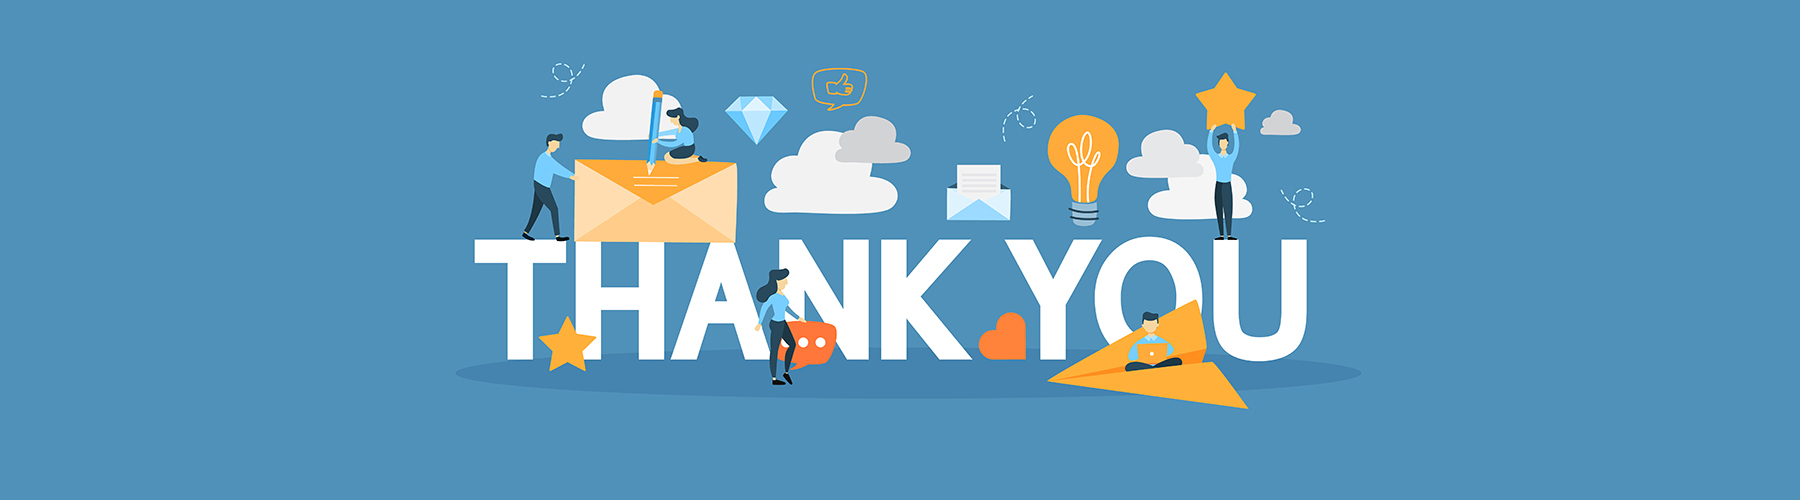